# In class exercises for 02.27.2019 - practice file I/O
* The first function here is written out for you, and instructions for each problem are written in text cells below. Just run the first code block to define the "take_photo" function and then you can advance down and start on Question 0. 

* Don't worry about understanding the code in the photo capture function at the top here, I got it from a tutorial written by Google for the Colab environment (see link below). I'm providing it just so that you quickly use their function to generate and manipulate image files with your built in camera. 

* **NOTE: I have not shown you in class how to answer all of the questions. This is intentional. One of the most important things in problem solving using code is developing the ability to seek out and use information from online help pages, message boards (like stackoverflow), and from online tutorials. If you leave this class with the knowledge that we've learned thus far in class, AND you can effeciently seek out online sources to solve problems, then you'll be in good shape!

[photo capture function from google 'external data' notebook](https://colab.research.google.com/notebooks/io.ipynb#scrollTo=z6e6j8HyQ5hz)

In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=1.0):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

## Question 0: Call the above function to take a picture with your webcam. Its likely (hopefully) that your computer will ask you if its ok if you access the webcam. The code will fail if you deny access...and if it doesn't prompt you for permission then you might want to consider updating your security settings so that it does!

In [27]:
take_photo(filename='photo2.jpg', quality=1.0)

<IPython.core.display.Javascript object>

'photo2.jpg'

## Question 1: Now that you've taken your photo, read the following help pages to figure out how to use matplotlib to read the jpg image that you took from the webcam.

* **Part A** To get started, you first need to import a matplotlib module named 'pyplot'. To do this, recall from a few weeks back how to import a module using the "import module as alias" syntax. In this case, use the following line at the top of the next code cell:

   * import matplotlib.pyplot as plt
  
* **Part B** Read in your saved image using the methods associated with the newly imported 'plt' object. See the following help page to get started

[imread help](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imread.html)

* **Part C** After reading the image, print out the results. So if your image is stored in the variable "img" (for example), just type "img" and take a look at the output

* **Part D** The varialbe that is storing your image (e.g. img) is an instance of the numpy.ndarray class. We'll talk more about this class next week, but for now just know that an ndarray is for storing matrices of data (the 'n' in nd means n-dimensional, or as many dimensions as you want). Recall from last week that instances of a class have methods. Search online for the method associated with an numpy.ndarray that will tell you what shape the data array has. What is it? The shape will tell you the width and height of your image (in pixels), followed by a 3 or a 4. The 3 or the 4 indicates if your image is stored in RGB (red, green, blue) format, or RGBA (red, green, blue, alpha) format, with alpha coding the opacity.

   * So basically, the picture that you took of yourself is just a matrix of numbers, with the first two dimensions indicating the rectangular shape, and the 3rd dimension indicating the intensity of the red, green, and blue at each pixel...that's it! And if you change those numbers, you will change the picture.   

**Note: if you still need help after reading the imread page, try googling around a bit, for example, you might try searching "simple plt.imread example jpeg" or similar to find helpful code snippets**

In [21]:
# import matplotlib
import matplotlib.pyplot as plt

# read the image
img = plt.imread('photo.jpg')

print(img.shape)
print(img.dtype)

(480, 640, 4)
uint8


## Now learn how to show, or display, the image inline with your code in your notebook. Check out the help page in the link below

[imshow help](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html)

* **Part A** First just show the image. You'll see that there are (probably) grid lines in the picture, and there are also axis tick labels indicating the X,Y coordinates of the pixels. 

* **Part B** Start googling to figure out how to turn off the grid lines. You might try something like "turn off plt gridlines" for example. 

* **Part C** Figure out how to turn off the axis labels...now your image should look just like the photo that you took

**Note: after you call imshow and the methods to turn off the grid lines and the axis labels also make a call to plt.show(). This may or may not be in the directions that you find online, but it tells python to immediately display the image and it will suppress some unwanted output. You can try it with and without plt.show() to see what I mean. 

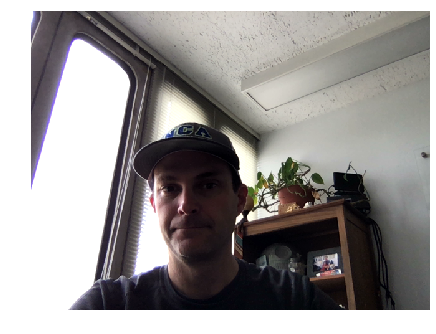

In [24]:
plt.imshow(img)
plt.grid(False)
plt.axis('off')

plt.show()

## Question 2: Recall that your image is just a X,Y,4 (or sometimes X,Y,3) matrix of numbers. We'll forget about the alpha channel for a moment (the 4th entry in the 3rd dimension of the RGB image matrix). 

* Show the image using only the Blue and Green 'channels' (i.e. set the red channel to be all 0's to remove reds from the image). To do this, you'll want to use slicing where you can index into a subset of the matrix and assign all the indexed values to 0. 

  * Remember the difference between a copy and a view. You already have your image loaded into a variable, so probably a good reason to make sure that you make a copy of it first. Otherwise any changes you make to the RGBA values will also impact your original image and you'll have to reload everything if you want the original back. Recall from week 00 or week 01 that with a list, you could either use the new_list = list[:] notation to make a copy, OR you can call the copy() method like: new_list = list.copy(). With an ndarray, use the later method, so ndarray.copy()

  * A few hints about slicing (indexing) into ndarrays are in the code cell below. 

In [0]:
# hints...remember the slicing we did with lists in the early part of the class. 
# e.g. if you have my_list = list(range(0,10)) and you want to print it all out,
# then just go like this:
my_list = list(range(0,10))
print(my_list[:])

# so the : indicates "give me all the values"

# on the other hand, you can also specify a limited range of indices if you want
# so lets say we want the first and the second elements only
print(my_list[:2])
# or we could do this to make it more explict
print(my_list[0:2])

# indexing into a ndarray works much the same way...if you want all entries in 
# a dimension, then use a :, else specify the range (and start counting at 0!!!)

# so lets say you had a ndarray that was X,Y,Z - just like your image array - then 
# to get only the first 5 of the X and Y values but all of the corresponding Z values, you 
# can go: img[0:5,0:5,:], or to get all X and Y values but only a subset of the 
# z values: img[:,:,0:1], which, in the case of your X,Y,4 image matrix, would
# correspond to all pixels (i.e. all X and Y coordinates) and then only the Red
# channel from the RGBA dimension. So your job here is just to set the Red channel
# to 0s so that the image only has blues and greens!

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1]
[0, 1]


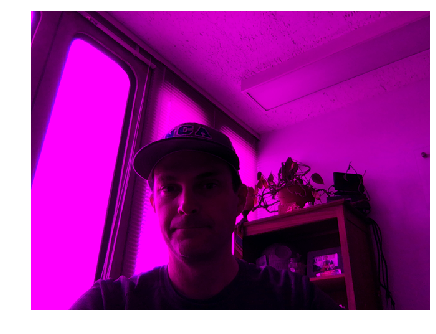

In [25]:
# copy the image
new_img = img.copy()
# set all values in the blue and green channels to 0
new_img[:,:,1:2] = 0
plt.imshow(new_img)
plt.grid(False)
plt.axis('off')
plt.show()

## Question 3: Use the camera capture function to take another photo. If you're both ok with it, maybe take a picture of someone else in the class for fun. Otherwise, another picture of you will work fine. 

* **Make sure that you explicitly give it a different name - maybe just call it photo2.jpg for simplicitly.** 

* **Part A:** Read in both images and assign them to different variables (e.g. img1 and img2)

* **Part B:** Blend the two images together! Recall that we have a X,Y,4 data matrix, where the last dimension corresponds to the RGBA 'channels' (red, green, blue and alpha). To blend the images, you can ignore the last entry (alpha). Normally, the alpha channel would control the opacity, or saturation, or the image, but we're going to blend the images by hand using just the RGB values. This should be relatively easy to ignore the alpha channel because it should be all 1's in both of the images that you took. 

  * bonus - figure out how to achieve the blending effect just by modulating the alpha channels

* I inserted the formula in the code cell below that you'll want to apply to the two image matrices. 

* Note that you also need to cast, or convert, the results from floating point numbers to integers as imshow will expect integer values from 0:255 for the RGBA values. To do this you can use the NumPy astype method that will create a copy of the object cast as the desired data type. For example, to convert from a matrix of floating point values (y) to a matrix of integers (x), you can go x = y.astype(int). See link below for more

[link to NumPy astype](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.astype.html)

* **IMPORTANT** As we'll go over in lots and lots of detail next week, math operations like multiplication, subtraction, and addition on ndarrays operate on ALL elements of the array at once. For example, if you had two X,Y,Z 3D matrices and you subtract one from the other, then the default behavior is to subtract them element-by-element. That is, you subtract the corresponding points in the two matrices (or multiply them, etc). This makes it easy to implement the formula above without looping!

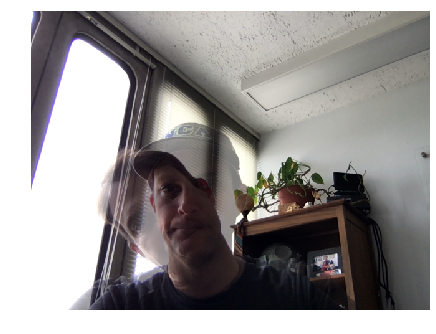

In [28]:
# read in second image
img2 = plt.imread('photo2.jpg')

# set up the blend factor - 0 will give only the first image, 1 will give just 
# the second image, .5 will be an even mix, etc. 
blend_factor = .5

# blend the images
blend_image = (img * (1.0 - blend_factor) + img2 * blend_factor)

# cast as int
blend_image_int = blend_image.astype(int)

# show!
plt.imshow(blend_image_int)
plt.grid(False)
plt.axis('off')
plt.show()